## Implementamos algunos algoritmos generadores del número $\pi$, con la intención de comparar su desempeño.

In [3]:
from decimal import Decimal, getcontext
import matplotlib.pyplot as plt
from termcolor import colored
import numpy as np
import math as m

In [8]:
# Tomamos el valor de pi con una buena cantidad de cifras decimales\
# como referencia para ver que los algoritmos hagan bien su tarea 

numeroPi="3.1415926535897932384626433832795028841971693993751058209749445923078164062862\
089986280348253421170679821480865132823066470938446095505822317253594081284811\
174502841027019385211055596446229489549303819644288109756659334461284756482337\
867831652712019091456485669234603486104543266482133936072602491412737245870066\
063155881748815209209628292540917153643678925903600113305305488204665213841469\
519415116094330572703657595919530921861173819326117931051185480744623799627495\
6735188575272489122793818301194912"

In [9]:
len(numeroPi) # La expansión anterior tiene 500 decimales; la función len cunta también el 3 y el punto. 

502

### En seguida codificamos los algoritmos:
#### Leibniz: $\pi=4\Sigma_{n=0}^{\infty} \frac{(-1)^n}{2n+1}$    
#### Madhava: $\pi=\sqrt{12}\Sigma_{n=0}^{\infty} \frac{(-1)^n}{3^n(2n+1)}$
#### Chudnovsky: $\pi = 12\Sigma_{n=0}^{\infty} \frac{(-1)^n(6n)!(13591406+545140134n)}{(3n)!(n!)^{3}640320^{3n+3/2}} $

In [10]:
getcontext().prec = 505    # Con esta función indicamos con cuántos decimales deseamos desplegar los cálculos
                           # pedimos un poco más que los que tiene el valor de prueba "numeroPi" para hacer la comparación

def leibniz(n):
    pi = Decimal(0)
    for i in range(n):
        numerador = (-1)**i
        denominador = 2*i + 1
        pi += Decimal(numerador)/Decimal(denominador)

    pi = Decimal(4)*pi
    return pi

def madhava(n):
    pi=Decimal(0)
    for i in range(n):
        numerador = (-1)**i
        denominador = (2*i + 1)*(3**i)
        pi += Decimal(numerador)/Decimal(denominador)

    pi = Decimal(m.sqrt(12))*pi
    return pi

def chudnovsky(n): 
    t = Decimal(0)
    pi = Decimal(0)
    deno = Decimal(0)
    k = 0
    for k in range(n):
        t = (Decimal(-1)**k)*(m.factorial(Decimal(6)*k))*(13591409 + 545140134*k)
        deno = m.factorial(3*k)*(m.factorial(k)**Decimal(3))*(640320**(3*k))
        pi += Decimal(t)/Decimal(deno)
    pi = pi * Decimal(12)/Decimal(640320**Decimal(1.5))
    pi = 1/pi
    return str(pi)

In [14]:
madhava(10)  # El argumento (n) indica el número de iteraciones del algoritmo o los términos en la sumatoria    

Decimal('3.141590510938079917626584554509747798880766663231633691268162340541909653504908891013950321624008382662461577978401991958031657862207365959484090687189210549171817629818113962388956337152899728547271515075920788823233751822471260863901870921962909375158225315572204945238109120946206397670934102790796085397876731694209302536584066479975460851761989501035736813998736051507777482117835543156288738472229152451858818356034526453311251181016371042998978123645274456216116830980060222374432008903081282650394')

In [19]:
def exactitud(n):                      # Indica el número de cifras exactas del cálculo, las imprime en rojo 
    exactos=0
    estimacionPi=str(chudnovsky(n))
    for k in range(len(numeroPi)):
        if numeroPi[k]==estimacionPi[k]:
            continue
        else:
            exactos=k-2
            break
    digitosExactos=estimacionPi[0:exactos+2]
    digitosInexactos=estimacionPi[exactos+2:]
    print(colored(exactos, 'green'), "decimales exactos:", colored(digitosExactos,'red'), end="")
    print(digitosInexactos)
    return exactos

In [22]:
lista=[1,2,3,4,5]                 # corremos el algoritmo para los valores de n enlistados

for i in lista:
    print([i, exactitud(i)])      # El corchete indica número de iteración y cantidad de decimales exactos
    

13 decimales exactos: 3.141592653589734207668453591578298340762233260915706590894145498737666209401659108066117347469689757798160379655566278035801345995935132861731766159828062231080441973785312530565152115747085933831774415459602274587627712846591418133739922859535784112988088378242126794689633529216676947336619680715159349309584269265090801876996061470662170037502060173442845131424809303278687755604071472306942981344578746665772644498559629091986055963635898400894713810116111195685684870596257013872723252284798186917185
[1, 13]
27 decimales exactos: 3.1415926535897932384626433835873506884758663459963743156549058068013014505652035911058309102192909290815684364870868935674099610283178580860728092057119885131940924723468292709486308726066057311875407358058079867373473378216273446480904372297130185992787043157063969533847991279623078968785162571599750758281127333966274749304493611125372084511271252630011421327481089807609969743402108669977068528772193146544532487164958054577292292752241

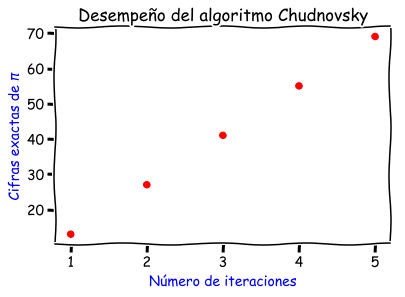

In [24]:
with plt.xkcd():                                          # Gráficamos iteración vs decimales exactos
    x,y =[[1,2,3,4,5],[13,27,41,55,69]]
    plt.plot(x,y,'o',linewidth=3,color='r')
    plt.xlabel('Número de iteraciones',color='b')
    plt.ylabel('Cifras exactas de $\pi$',color='b')
    plt.title('Desempeño del algoritmo Chudnovsky')
    plt.show()

##### La gráfica solo se muestra para el algoritmo Chudnovsky porque los otros algoritmos tienen desempeños bajos, como puede comprobarse corriendo las celdas anteriores